Importing Library

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr

import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import math
from datetime import datetime
from datetime import timedelta

import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
features = pd.read_csv(r'D:\Work\Data Analytics\Project\Internship\Project 7 Time Series Breakdown of Retail Sales\Dataset\features.csv')
stores = pd.read_csv(r'D:\Work\Data Analytics\Project\Internship\Project 7 Time Series Breakdown of Retail Sales\Dataset\stores.csv')
train = pd.read_csv(r'D:\Work\Data Analytics\Project\Internship\Project 7 Time Series Breakdown of Retail Sales\Dataset\train.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


Checking Null Values

In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
features = features.fillna(0)

Merging Datasets

In [8]:
df = train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [9]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)

In [10]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [11]:
df.shape

(421570, 16)

Store and Depaerment Pivot Table

In [12]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept', values='Weekly_Sales', aggfunc='mean')
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [13]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,0.00,0.0,0.00,0.00,0.00,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,0.00,0.0,0.00,0.00,0.00,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,0.00,0.0,0.00,0.00,0.00,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,0.00,0.0,0.00,0.00,0.00,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,0.00,0.0,0.00,0.00,0.00,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,0.00,0.0,0.00,0.00,0.00,182.318780,8.743,B,118221


In [14]:
df = df.loc[df['Weekly_Sales'] > 0]

In [15]:
df.shape

(420212, 16)

In [16]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Date Range

In [17]:
pd.concat([df['Date'].head(5), df['Date'].tail(5)])

0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

Holiday

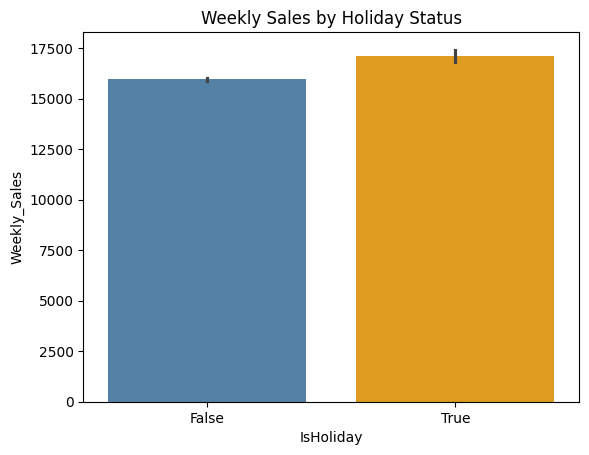

In [18]:
df.loc[:, 'IsHoliday'] = df['IsHoliday'].astype(bool)
custom_palette = {True: 'orange', False: 'steelblue'}
sns.barplot(x='IsHoliday', y='Weekly_Sales', hue='IsHoliday', data=df, palette=custom_palette, legend=False)
plt.title("Weekly Sales by Holiday Status")
plt.show()

In [19]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [20]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [21]:
df = df.copy()
df['Super_Bowl'] = False
super_bowl_dates = ['2010-02-12', '2011-02-11', '2012-02-10']
df.loc[df['Date'].isin(super_bowl_dates), 'Super_Bowl'] = True

In [22]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [23]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [24]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [25]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

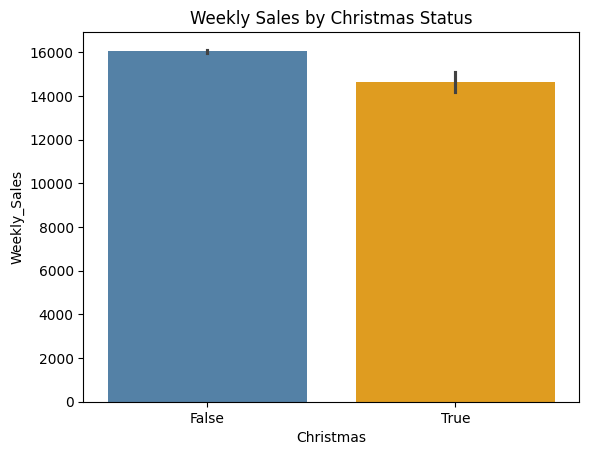

In [26]:
df.loc[:, 'Christmas'] = df['Christmas'].astype(bool)
custom_palette = {True: 'orange', False: 'steelblue'}
sns.barplot(x='Christmas', y='Weekly_Sales', hue='Christmas', data=df, palette=custom_palette, legend=False)
plt.title("Weekly Sales by Christmas Status")
plt.show()

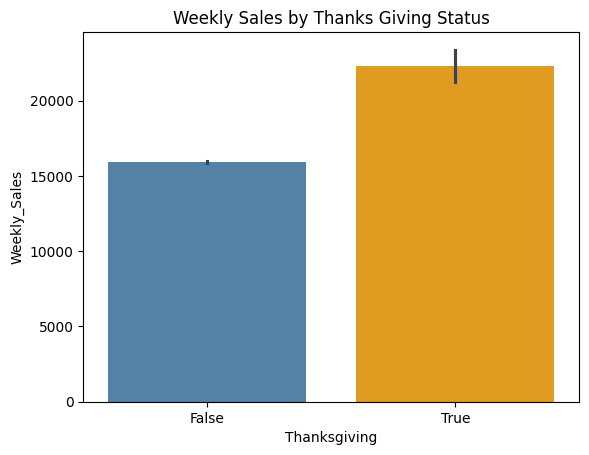

In [27]:
df.loc[:, 'Thanksgiving'] = df['Thanksgiving'].astype(bool)
custom_palette = {True: 'orange', False: 'steelblue'}
sns.barplot(x='Thanksgiving', y='Weekly_Sales', hue='Thanksgiving', data=df, palette=custom_palette, legend=False)
plt.title("Weekly Sales by Thanks Giving Status")
plt.show()

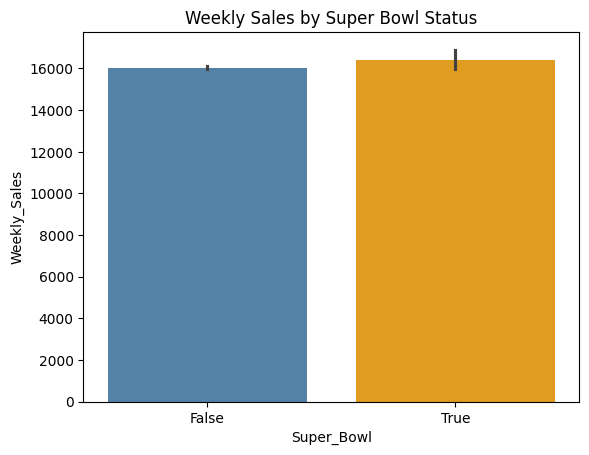

In [28]:
df.loc[:, 'Super_Bowl'] = df['Super_Bowl'].astype(bool)
custom_palette = {True: 'orange', False: 'steelblue'}
sns.barplot(x='Super_Bowl', y='Weekly_Sales', hue='Super_Bowl', data=df, palette=custom_palette, legend=False)
plt.title("Weekly Sales by Super Bowl Status")
plt.show()

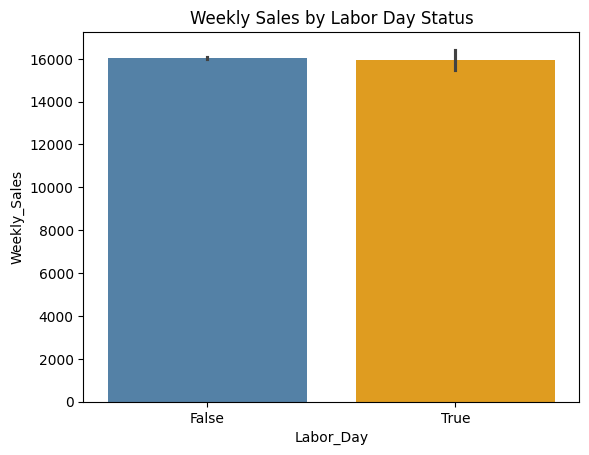

In [29]:
df.loc[:, 'Labor_Day'] = df['Labor_Day'].astype(bool)
custom_palette = {True: 'orange', False: 'steelblue'}
sns.barplot(x='Labor_Day', y='Weekly_Sales', hue='Labor_Day', data=df, palette=custom_palette, legend=False)
plt.title("Weekly Sales by Labor Day Status")
plt.show()

Type Effect on Holidays

In [30]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [31]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [32]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [33]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

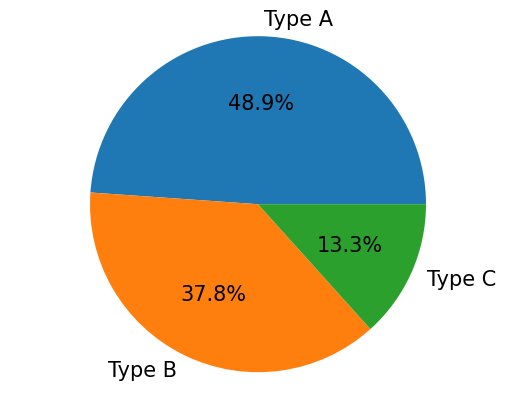

In [34]:
store_data = [48.88, 37.77 , 13.33]
my_labels = 'Type A','Type B', 'Type C'
plt.pie(store_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15})
plt.axis('equal')
mpl.rcParams.update({'font.size': 20})

plt.show()

In [35]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

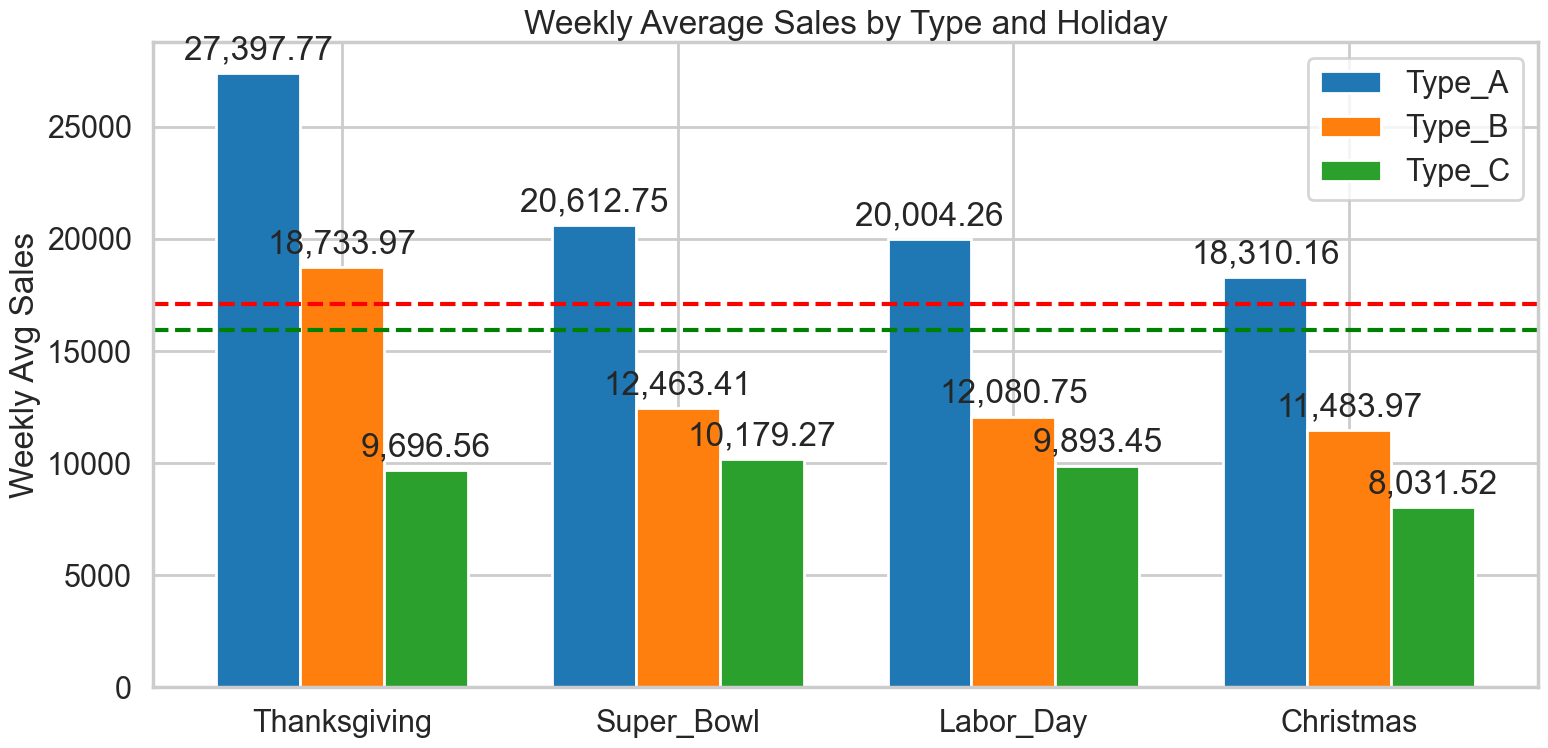

In [36]:
sns.set_style('whitegrid')
sns.set_context('poster')

labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56, 10179.27, 9893.45, 8031.52]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))

rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x, B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

ax.set_ylabel('Weekly Avg Sales')
ax.set_title('Weekly Average Sales by Type and Holiday')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.axhline(y=17094.30, color='red', linestyle='--', label='Benchmark 1')
ax.axhline(y=15952.82, color='green', linestyle='--', label='Benchmark 2')

fig.tight_layout()

plt.show()

In [37]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.0,0.00,0.00,0.00,126.669267,9.003,B,126512,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.0,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.0,0.00,0.00,0.00,136.689571,8.763,B,103681,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.0,0.00,0.00,0.00,182.783277,8.724,A,200898,False,False,True,False


Type Effect on Holidays

In [38]:
stores.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


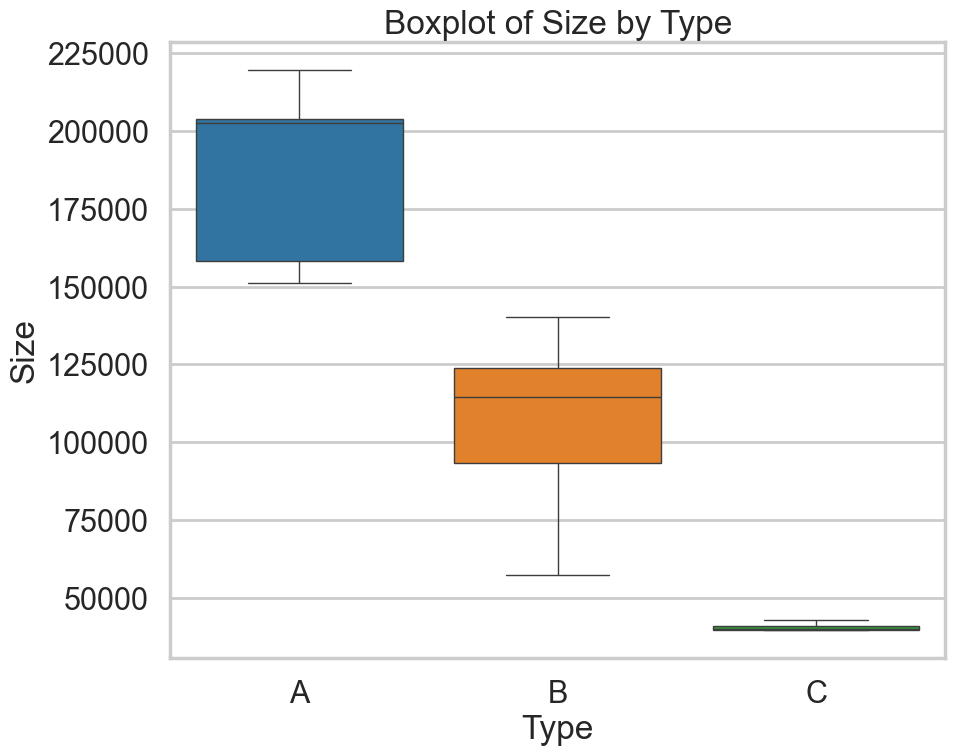

In [39]:
custom_palette = {
    'A': '#1f77b4',
    'B': '#ff7f0e',
    'C': '#2ca02c'
}

plt.figure(figsize=(10, 8))
sns.boxplot(x='Type', y='Size', hue='Type', data=df, showfliers=False, palette=custom_palette, legend=False)
plt.title('Boxplot of Size by Type')
plt.ylabel('Size')
plt.xlabel('Type')
plt.show()

Sales Insights

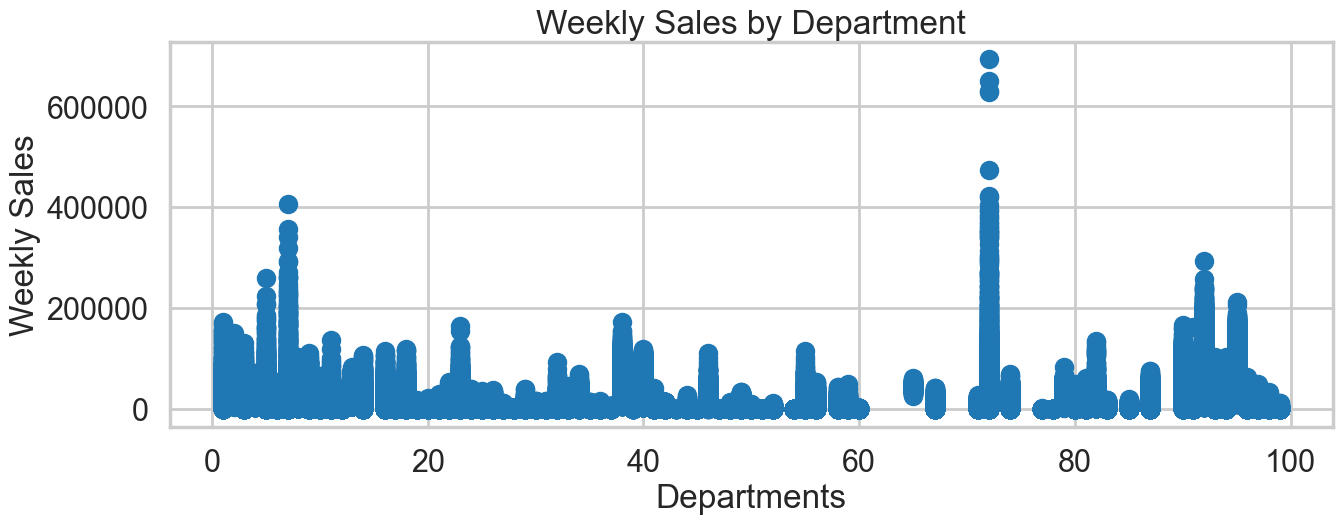

In [40]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

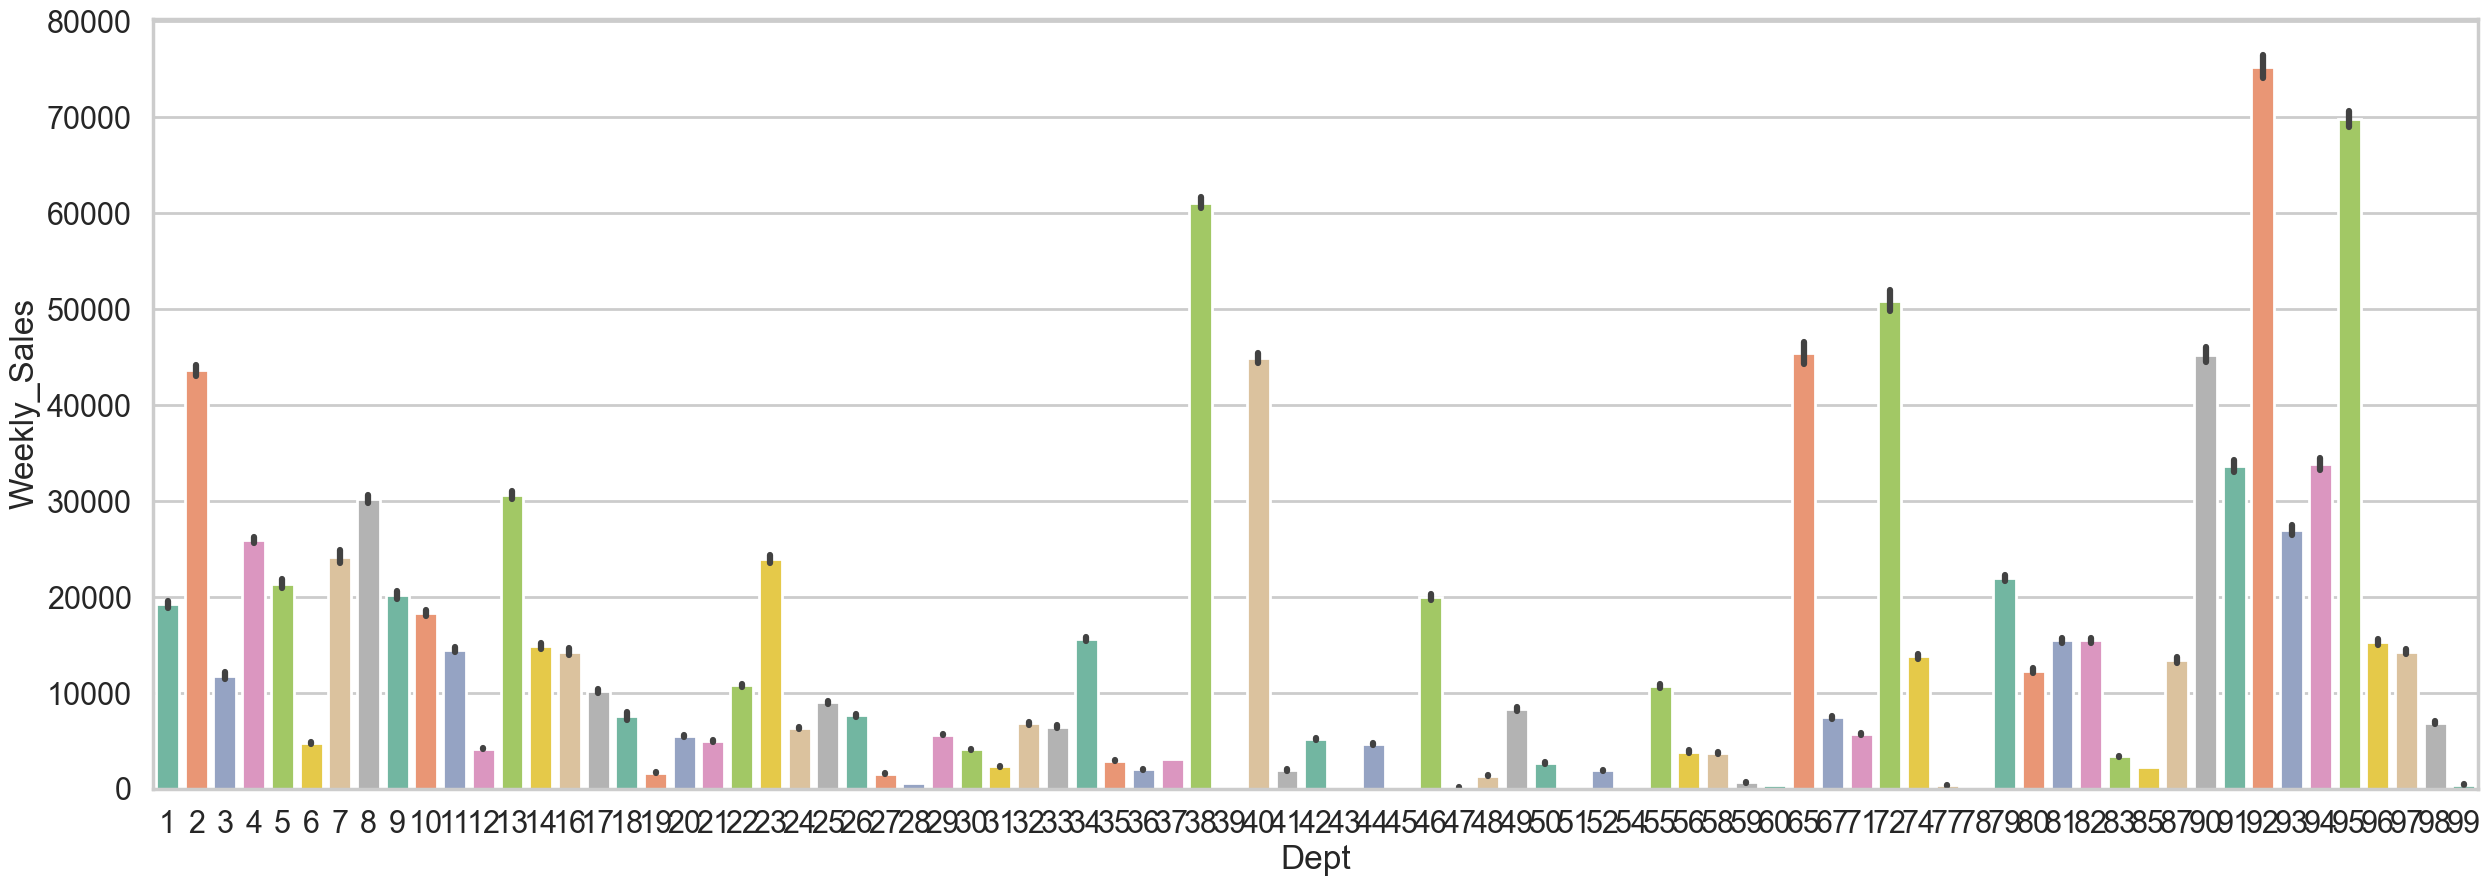

In [41]:
plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', hue='Dept', data=df, palette='Set2', legend=False)

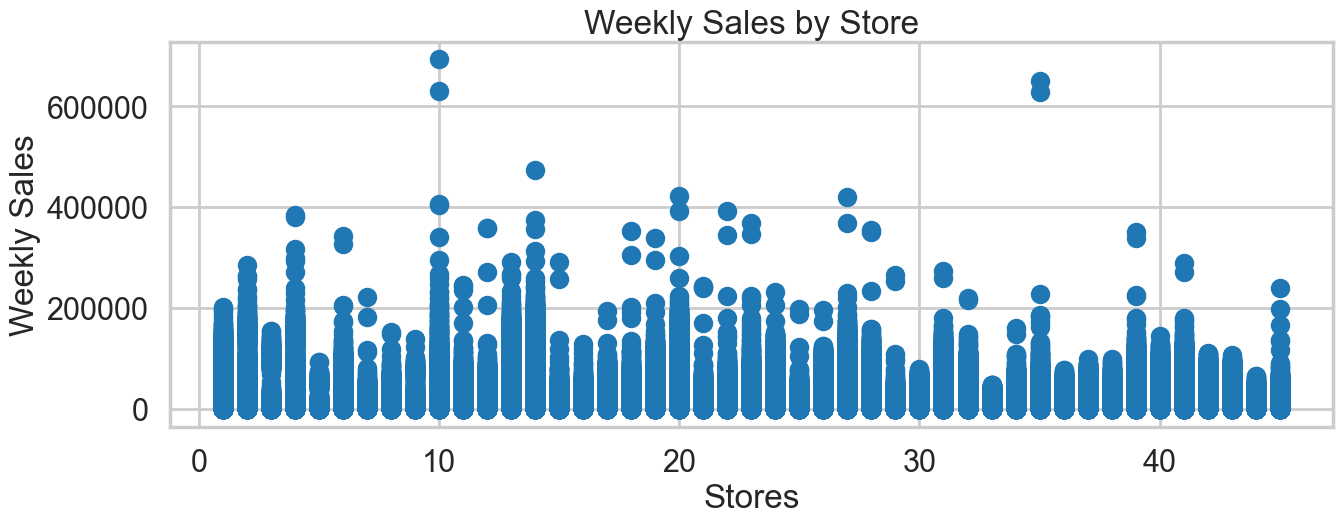

In [42]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

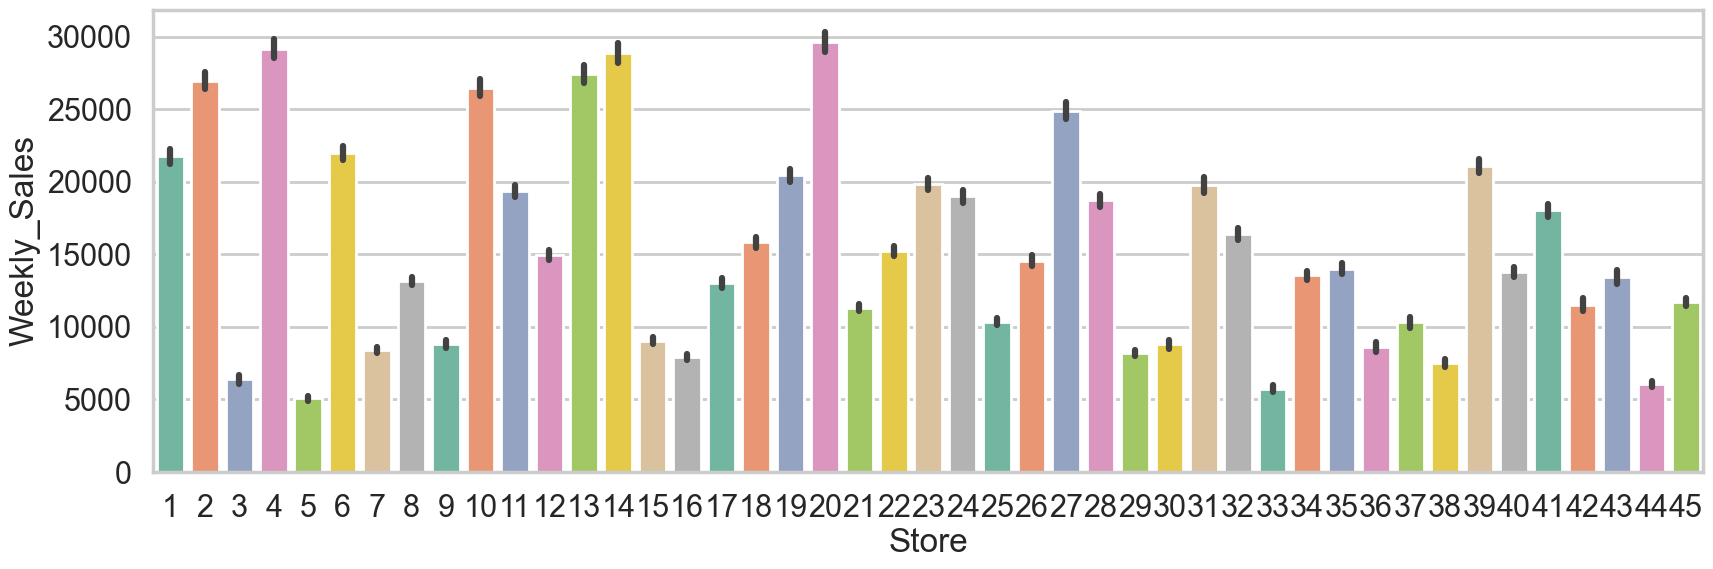

In [43]:
plt.figure(figsize=(20, 6))
fig = sns.barplot(x='Store', y='Weekly_Sales', hue='Store', data=df, palette='Set2', legend=False)

Data-Time Columns

In [44]:
df["Date"] = pd.to_datetime(df["Date"])
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [45]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [46]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

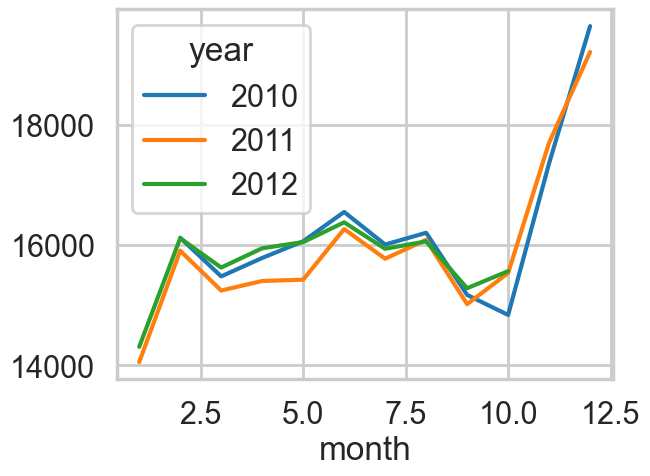

In [47]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

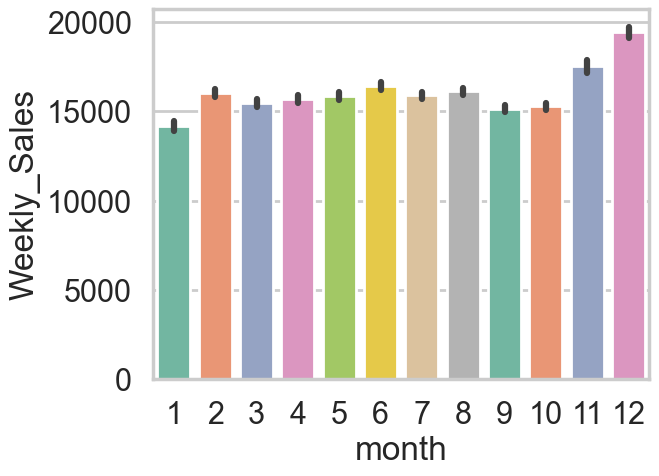

In [48]:
fig = sns.barplot(x='month', y='Weekly_Sales', hue='month', data=df, palette='Set2', legend=False)

In [49]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

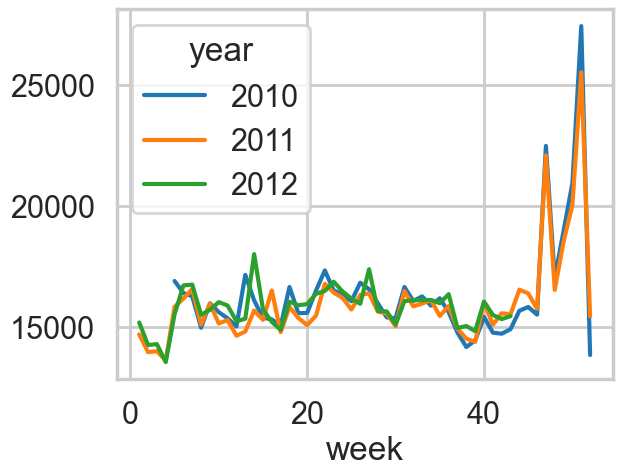

In [50]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

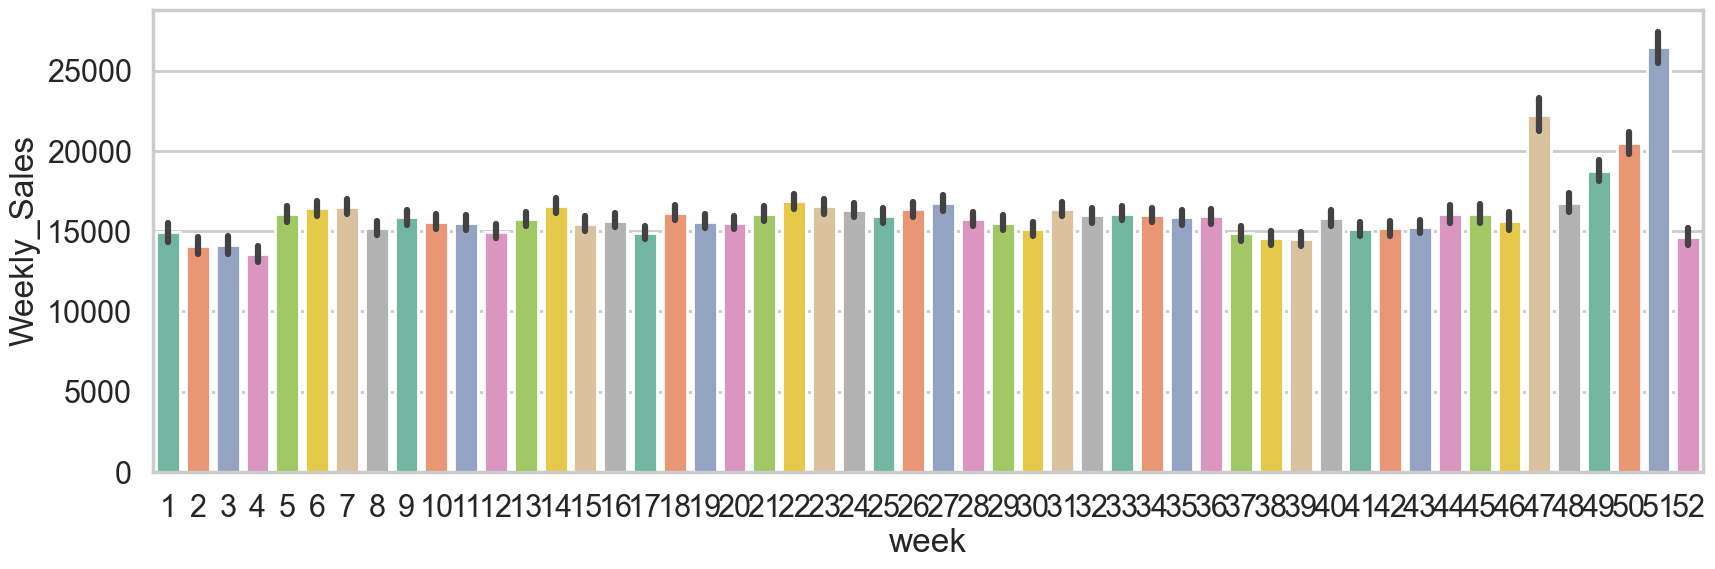

In [51]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', hue='week', data=df, palette='Set2', legend=False)

Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

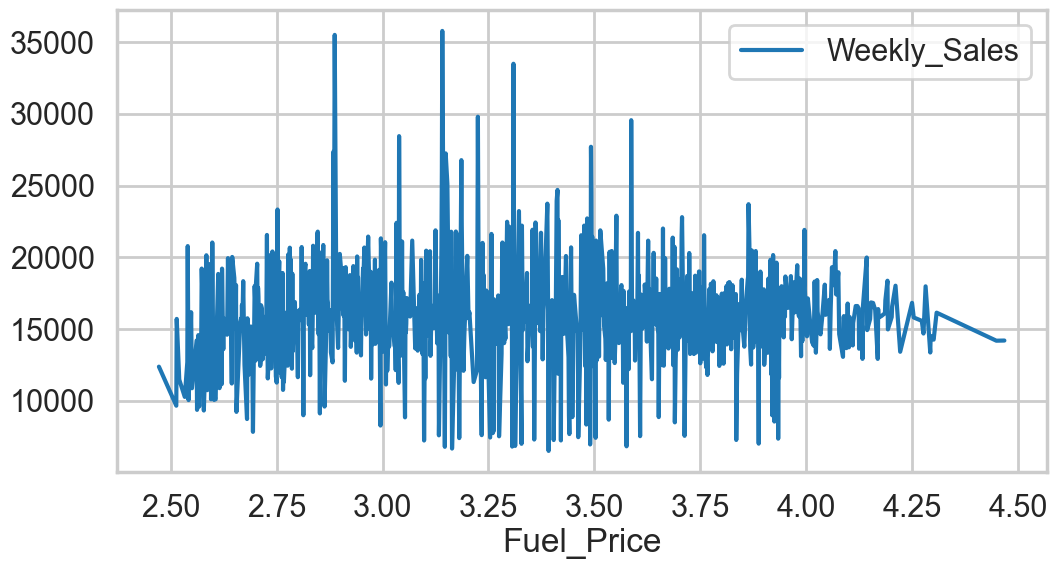

In [52]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot(figsize=(12, 6))

<Axes: xlabel='Temperature'>

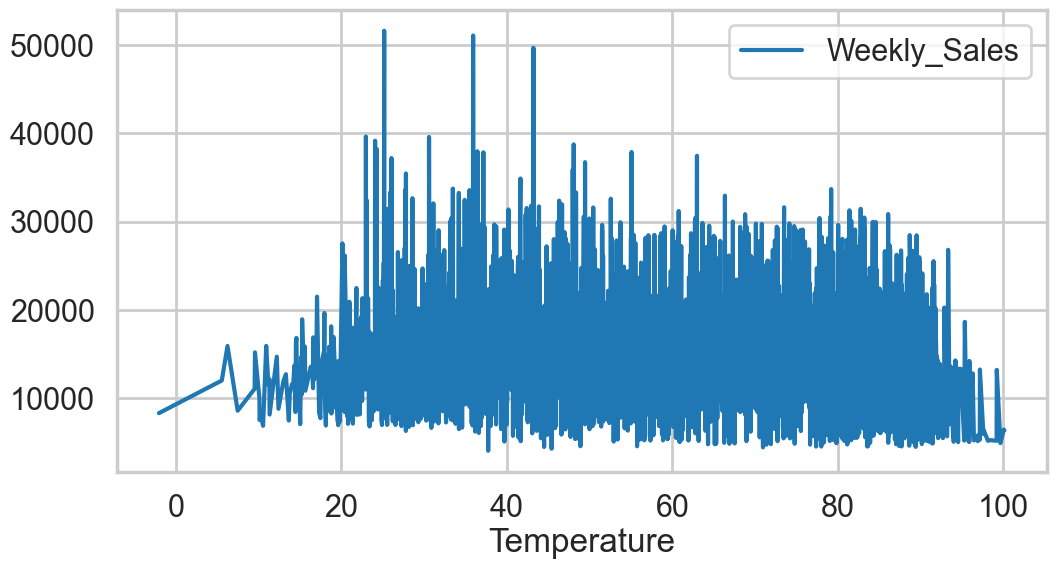

In [53]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot(figsize=(12, 6))

<Axes: xlabel='CPI'>

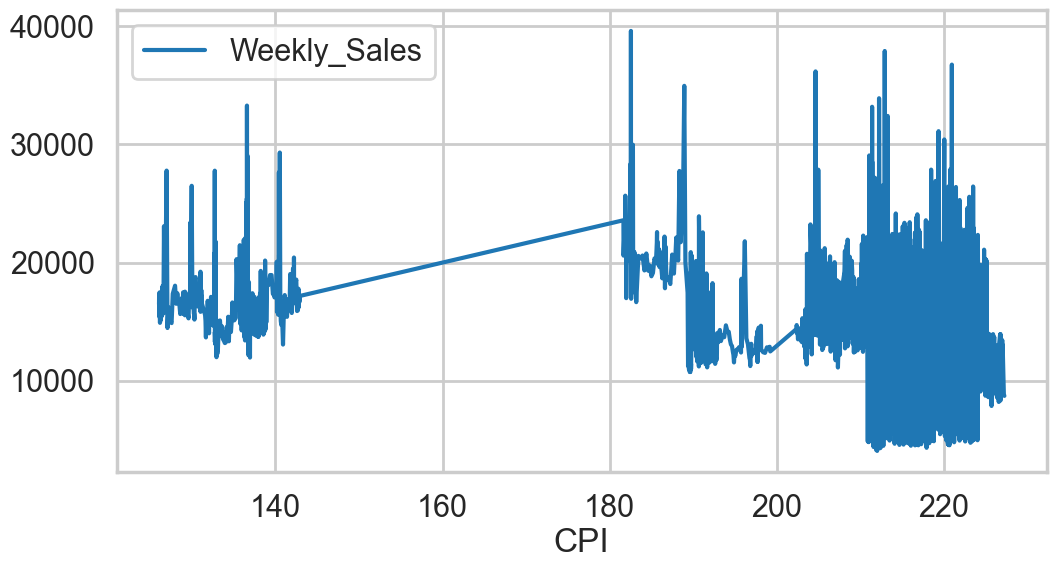

In [54]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot(figsize=(12, 6))

<Axes: xlabel='Unemployment'>

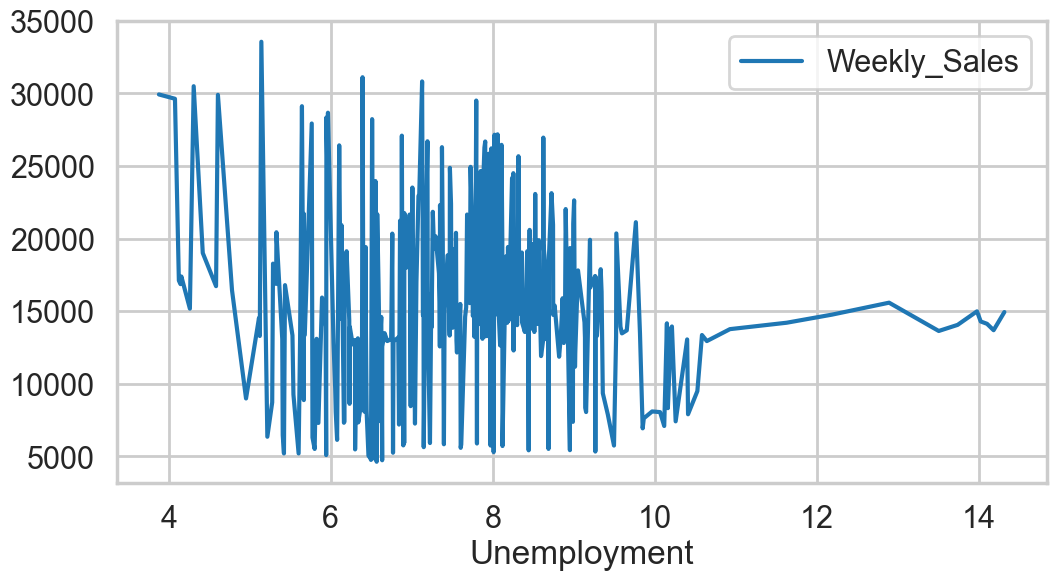

In [55]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot(figsize=(12, 6))

In [56]:
df.to_csv('clean_data.csv')

Preparing Data

In [57]:
pd.options.display.max_columns=100

In [58]:
df = pd.read_csv(r'D:\Work\Data Analytics\Project\Internship\Project 7 Time Series Breakdown of Retail Sales\clean_data.csv')

In [59]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [60]:
df['Date'] = pd.to_datetime(df['Date'])

Encoding the Data

In [61]:
df_encoded = df.copy()

In [62]:
type_group = {'A': 1, 'B': 2, 'C': 3}
temp = df_encoded['Type'].replace(type_group)
df_encoded['Type'] = temp.infer_objects(copy=False)

In [63]:
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)

In [64]:
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int)

In [65]:
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)

In [66]:
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)

In [67]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

In [68]:
df_new = df_encoded.copy()

Observation of Interactions

In [69]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True)

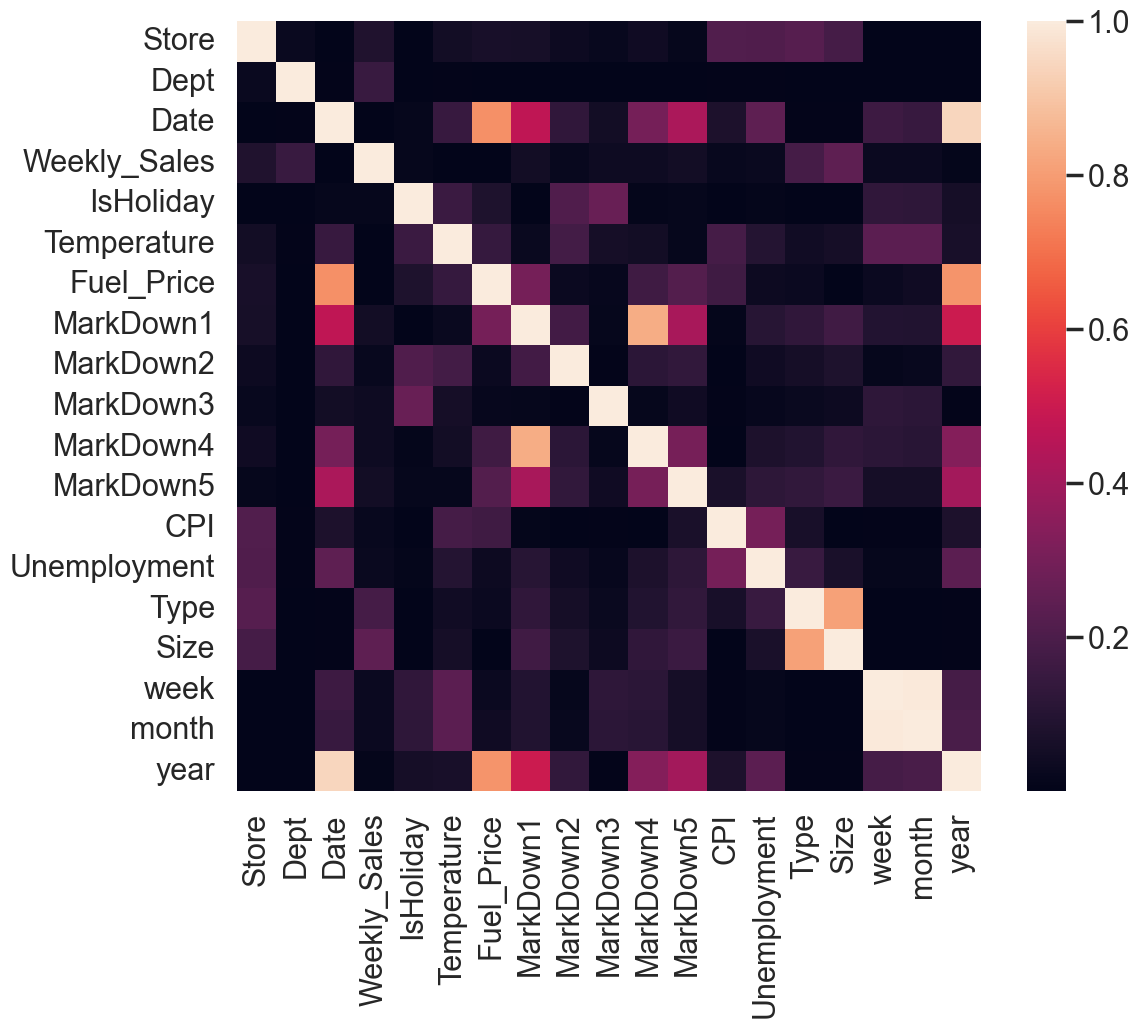

In [70]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())
plt.show()

In [71]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True)

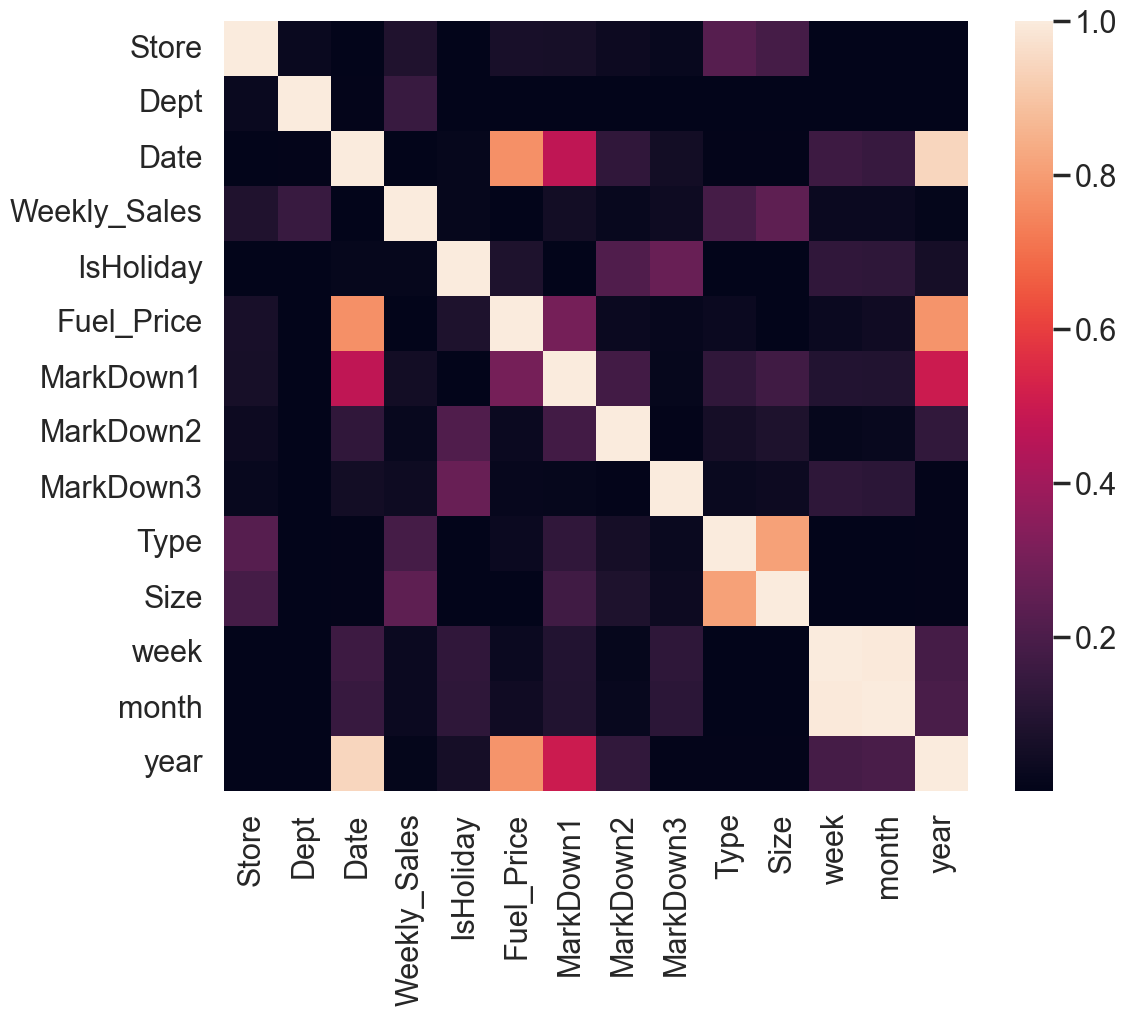

In [72]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())
plt.show()

In [73]:
df_new = df_new.sort_values(by='Date', ascending=True)

Creating Train-Test Splits

In [74]:
train_data = df_new[:int(0.7*(len(df_new)))]
test_data = df_new[int(0.7*(len(df_new))):]

target = 'Weekly_Sales'
used_cols = [c for c in df_new.columns.to_list() if c not in [target]]

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [75]:
X = df_new[used_cols]

In [76]:
X_train = X_train.drop(['Date'], axis=1)
X_test = X_test.drop(['Date'], axis=1)

In [77]:
def wmae_test(test, pred):
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

Random Forest Regressor

In [78]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

y_pred_test = pipe.predict(X_test)

In [79]:
wmae_test(y_test, y_pred_test)

5697.712824122053

To See Feature Importance

In [80]:
X = X.drop(['Date'], axis=1)

Feature ranking:
1. feature 1 (0.734834)
2. feature 8 (0.103608)
3. feature 0 (0.058842)
4. feature 7 (0.039401)
5. feature 9 (0.021299)
6. feature 3 (0.018655)
7. feature 10 (0.008636)
8. feature 6 (0.005390)
9. feature 4 (0.003045)
10. feature 5 (0.002715)
11. feature 2 (0.002032)
12. feature 11 (0.001543)


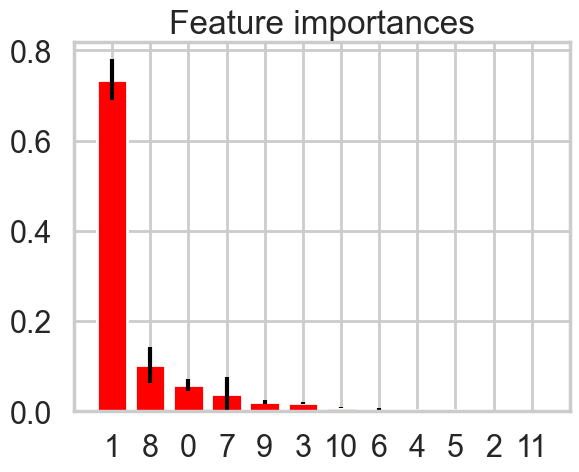

In [81]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [82]:
X1_train = X_train.drop(['month'], axis=1)
X1_test = X_test.drop(['month'], axis=1)

In [83]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

y_pred = pipe.predict(X1_train)

y_pred_test = pipe.predict(X1_test)

In [84]:
wmae_test(y_test, y_pred_test)

5450.408821519322

Data Modeling

In [85]:
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = 'Weekly_Sales'
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]]

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [86]:
X_enc = df_encoded[used_cols1]

In [87]:
X_enc = X_enc.drop(['Date'], axis=1)

In [88]:
X_train_enc = X_train_enc.drop(['Date'], axis=1)
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [89]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35, max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

y_pred_enc = pipe.predict(X_train_enc)

y_pred_test_enc = pipe.predict(X_test_enc)

In [90]:
wmae_test(y_test_enc, y_pred_test_enc)

2660.585435168574

Feature Importance

Feature ranking:
1. feature 1 (0.740225)
2. feature 13 (0.074453)
3. feature 12 (0.041055)
4. feature 0 (0.033746)
5. feature 10 (0.030454)
6. feature 11 (0.017543)
7. feature 18 (0.012157)
8. feature 3 (0.011184)
9. feature 4 (0.010293)
10. feature 19 (0.005989)
11. feature 7 (0.004640)
12. feature 9 (0.004178)
13. feature 8 (0.003567)
14. feature 5 (0.003513)
15. feature 6 (0.002597)
16. feature 20 (0.001178)
17. feature 16 (0.001030)
18. feature 2 (0.000953)
19. feature 17 (0.000670)
20. feature 15 (0.000303)
21. feature 14 (0.000275)


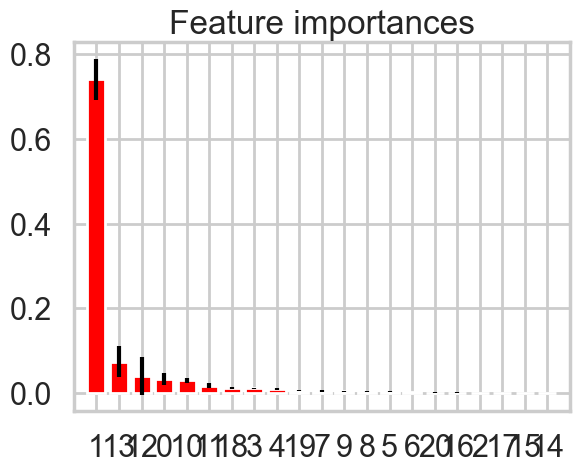

In [91]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking:')

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [92]:
df_encoded_new = df_encoded.copy()
df_encoded_new.drop(drop_col, axis=1, inplace=True)

Model According to Feature Importance

In [93]:
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = 'Weekly_Sales'
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]]

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [94]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40, max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

y_pred_enc = pipe.predict(X_train_enc1)

y_pred_test_enc = pipe.predict(X_test_enc1)

In [95]:
pipe.score(X_test_enc1,y_test_enc1)

0.735025800467954

In [96]:
wmae_test(y_test_enc1, y_pred_test_enc)

2018.8987478432969

Model with Dropping Month Column

In [97]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [98]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)

In [99]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)

In [100]:
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = 'Weekly_Sales'
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]]

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [101]:
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

y_pred_enc = pipe.predict(X_train_enc2)

y_pred_test_enc = pipe.predict(X_test_enc2)

In [102]:
pipe.score(X_test_enc2,y_test_enc2)

0.7104703970074872

In [103]:
wmae_test(y_test_enc2, y_pred_test_enc)

2191.378572764418

In [104]:
df_results = pd.DataFrame(columns=['Model', 'Info','WMAE'])

In [105]:
df_results = pd.concat([
    df_results,
    pd.DataFrame([{
        'Model': 'RandomForestRegressor',
        'Info': 'w/out divided holiday columns',
        'WMAE': 5850
    }])
], ignore_index=True)

In [106]:
new_rows = pd.DataFrame([
    {'Model': 'RandomForestRegressor', 'Info': 'w/out month column', 'WMAE': 5494},
    {'Model': 'RandomForestRegressor', 'Info': 'whole data', 'WMAE': 2450},
    {'Model': 'RandomForestRegressor', 'Info': 'whole data with feature selection', 'WMAE': 1801},
    {'Model': 'RandomForestRegressor', 'Info': 'whole data with feature selection w/out month', 'WMAE': 2093}
])

df_results = pd.concat([df_results, new_rows], ignore_index=True)

In [107]:
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


Time Series Models

In [108]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,True,False,False,False,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False,False,False,False,7,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False,False,False,False,8,2,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False,False,False,False,9,3,2010


In [109]:
df['Date'] = pd.to_datetime(df['Date'])

In [110]:
df.set_index('Date', inplace=True)

Plotting Sales

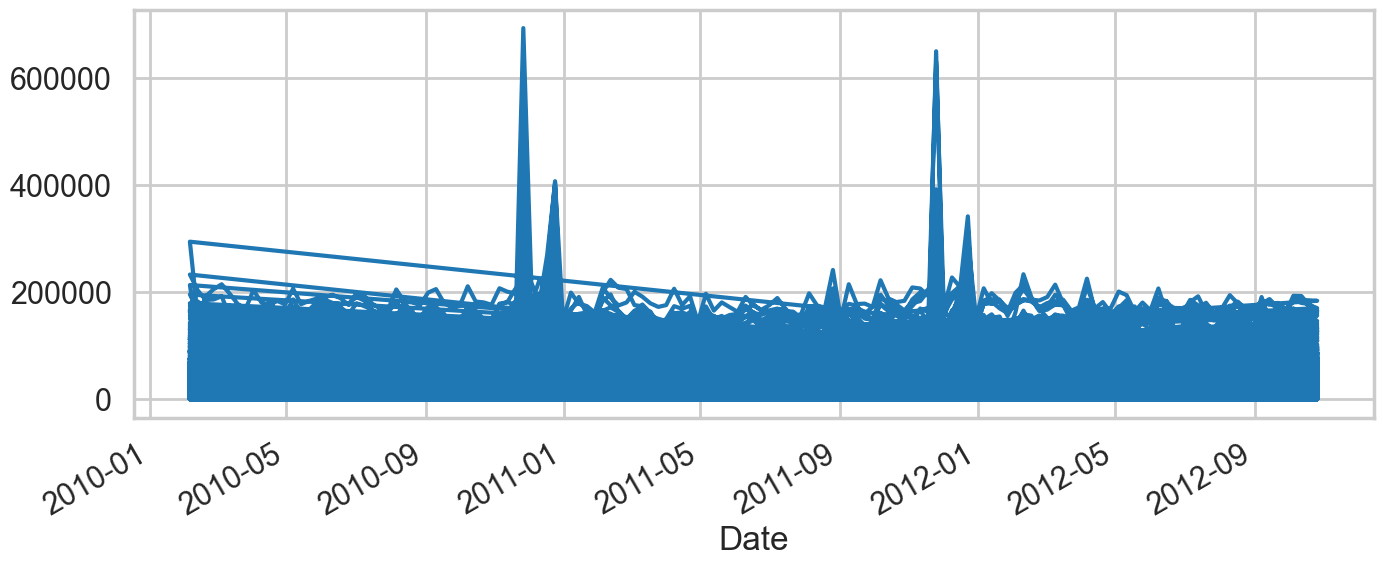

In [111]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [112]:
df_numeric = df.select_dtypes(include='number')
df_week = df_numeric.resample('W').mean()

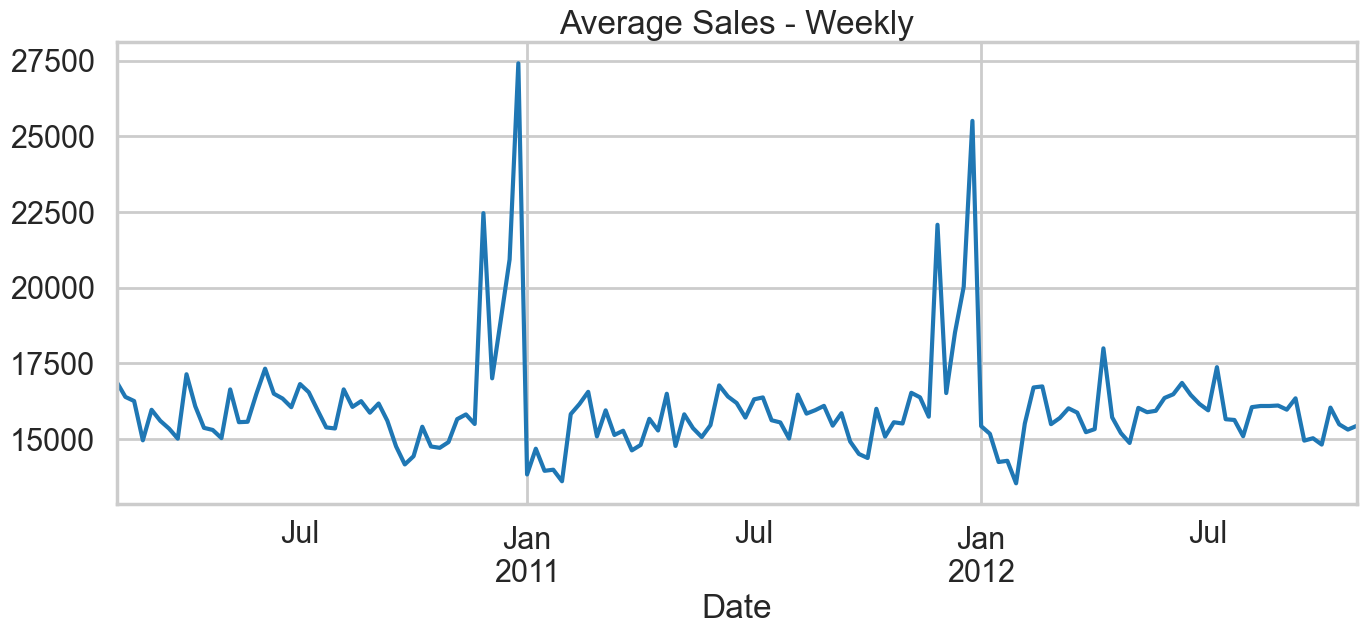

In [113]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [114]:
df_numeric = df.select_dtypes(include='number')
df_month = df_numeric.resample('MS').mean()

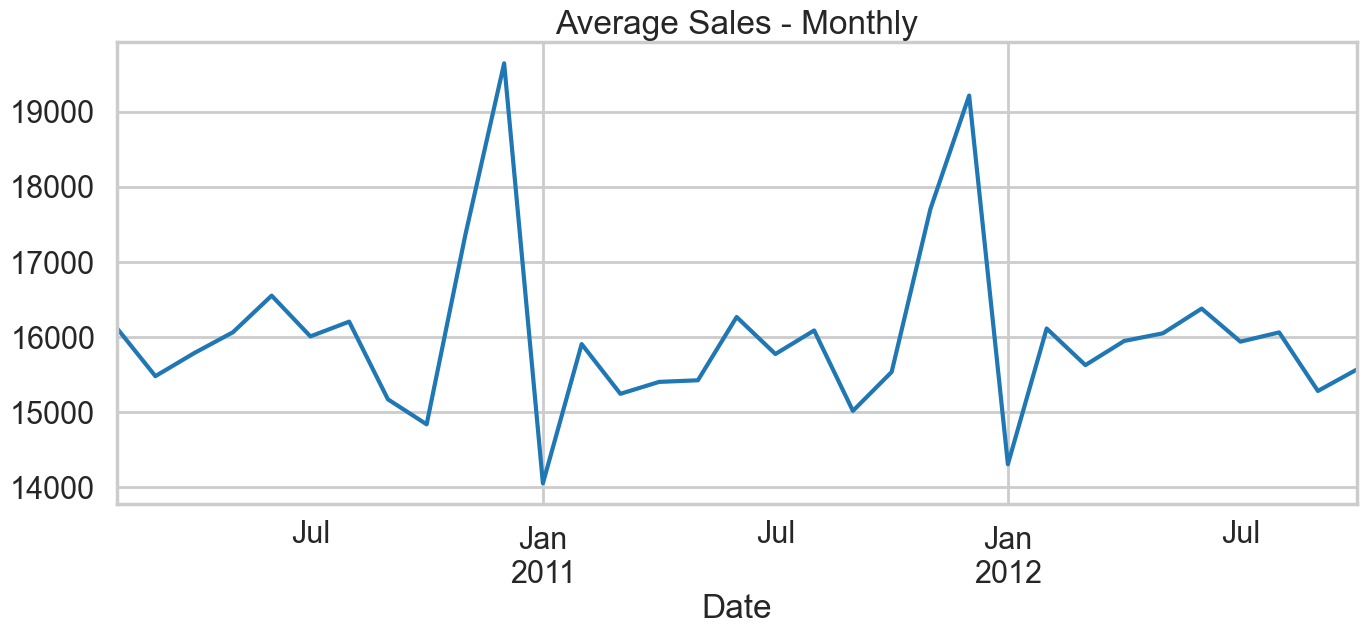

In [115]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [116]:
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

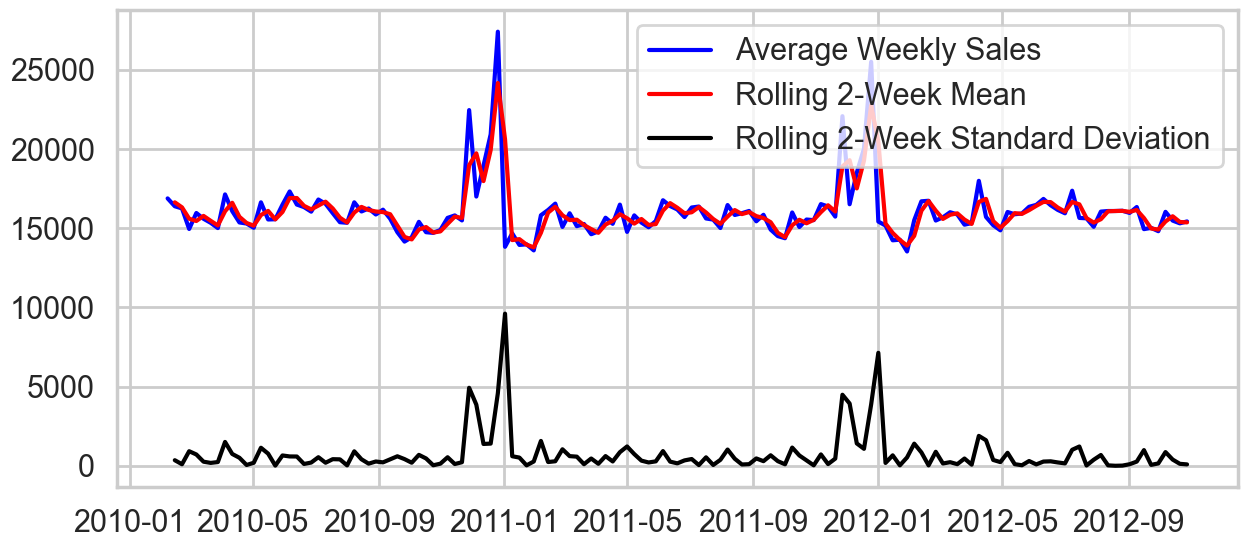

In [117]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

Adfuller Test

In [118]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

Train - Test of Weekly Data

In [119]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 16)
Test: (43, 16)


In [120]:
target = 'Weekly_Sales'
used_cols = [c for c in df_week.columns.to_list() if c not in [target]]

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

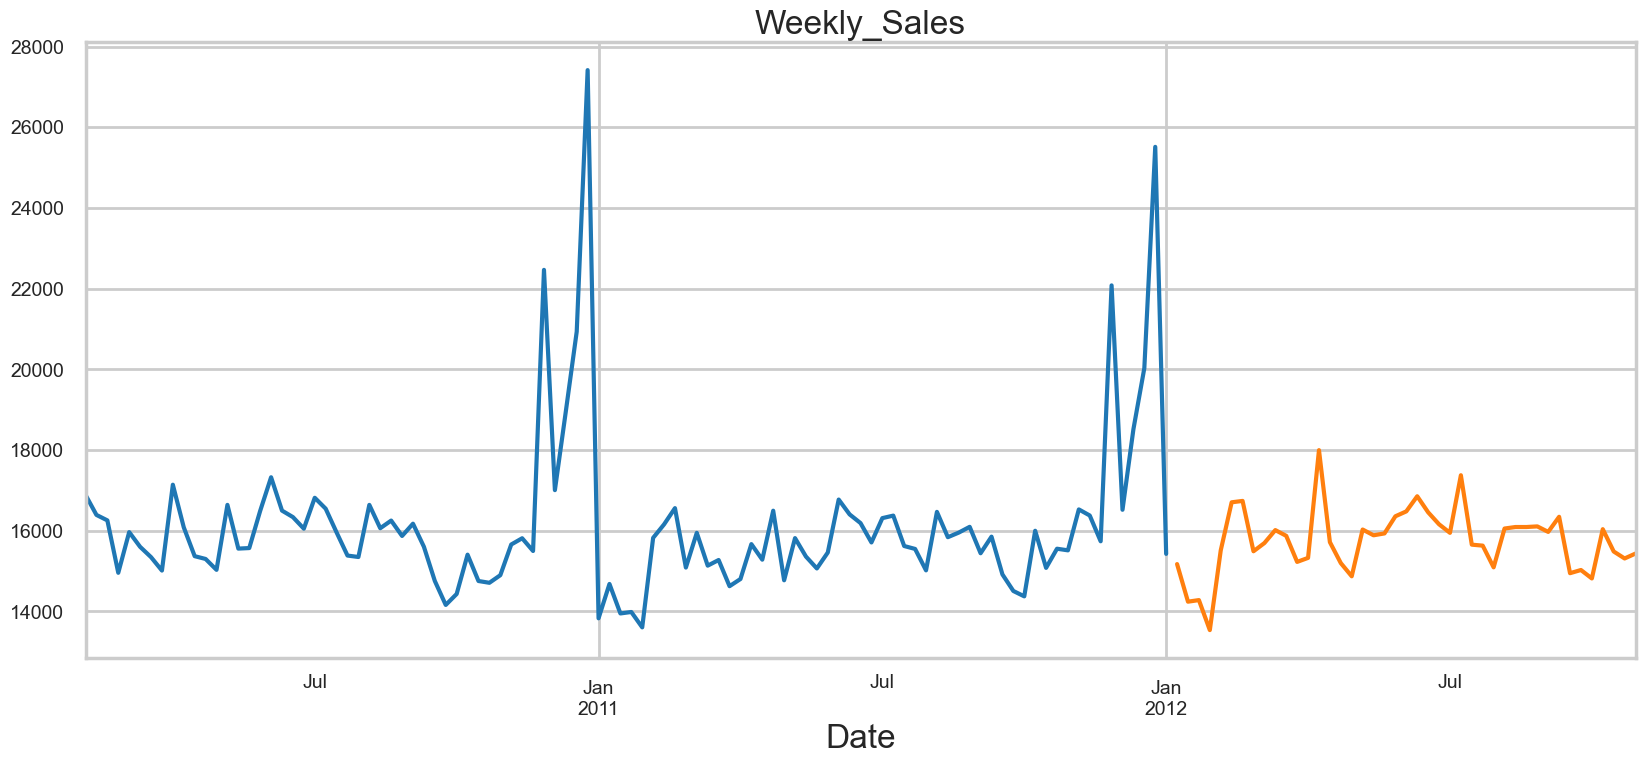

In [121]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Observing Seasonality

In [122]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)

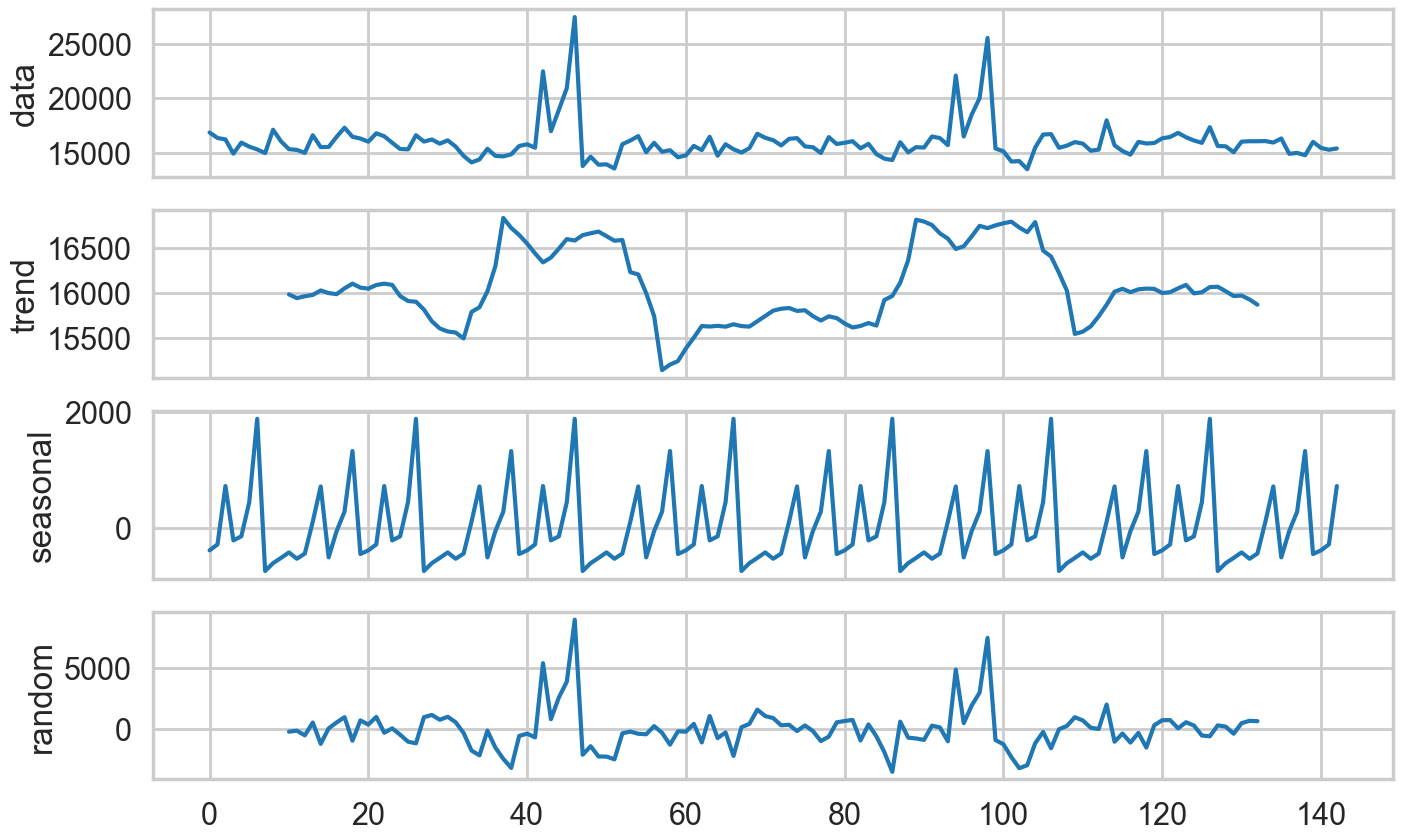

In [123]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

Making Data More Stationary

In [124]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna()

In [125]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

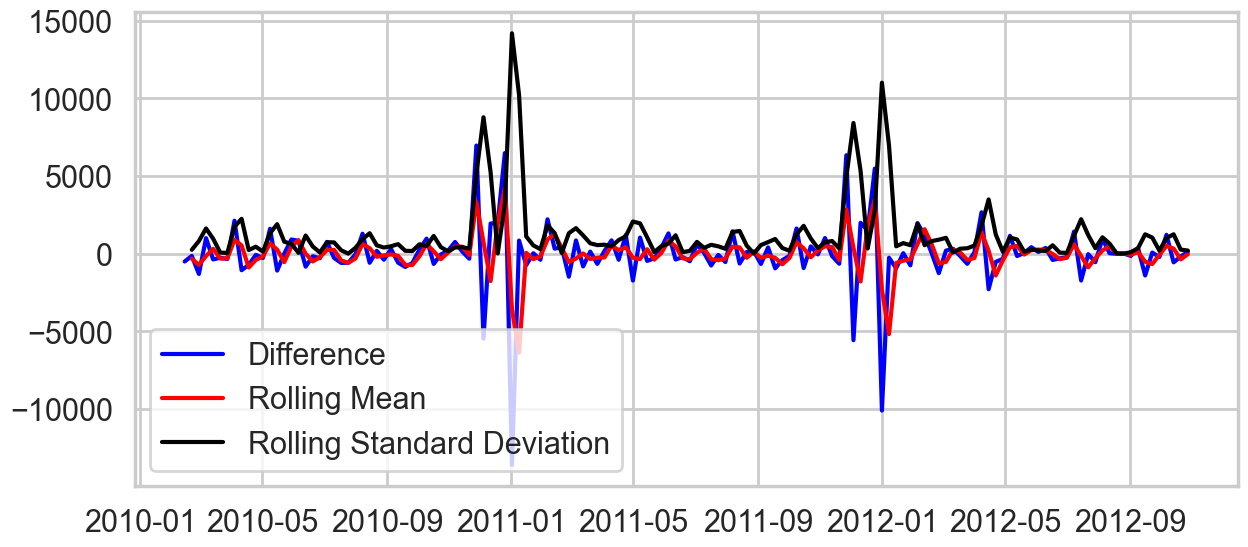

In [126]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [127]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna()

In [128]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

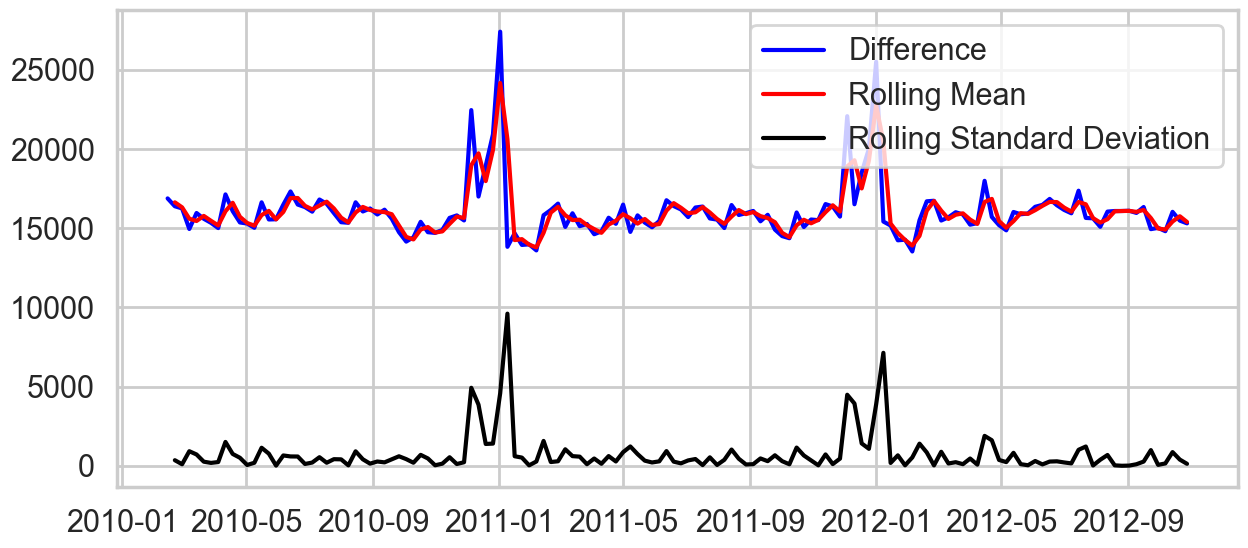

In [129]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [130]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()

In [131]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

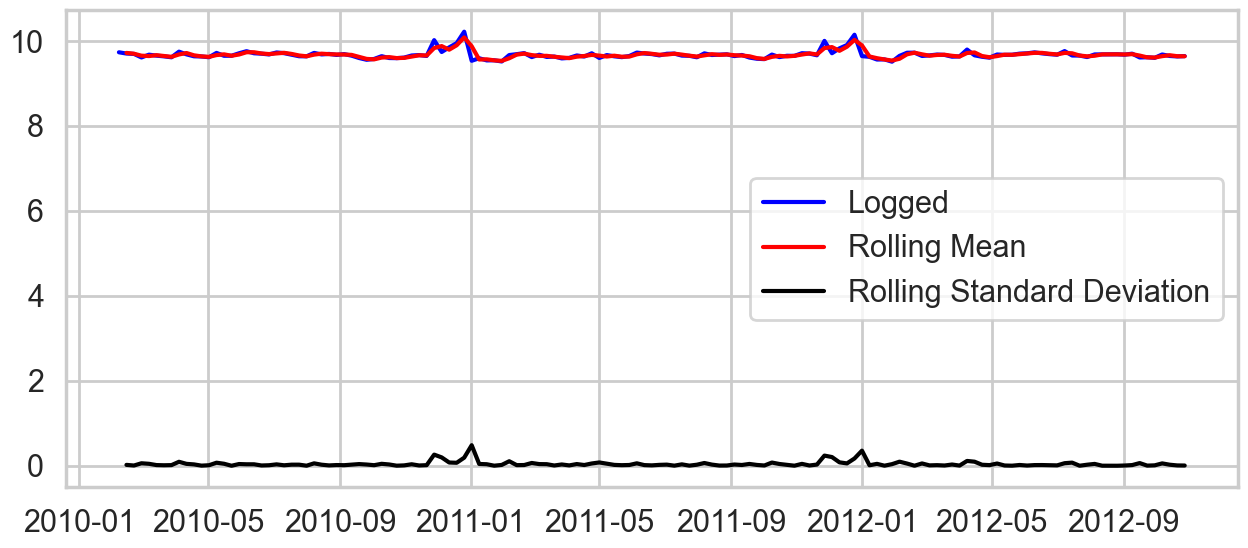

In [132]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

Train-Test Split

In [133]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [134]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                   max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                   information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                   error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

,order,"(3, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,200
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,True


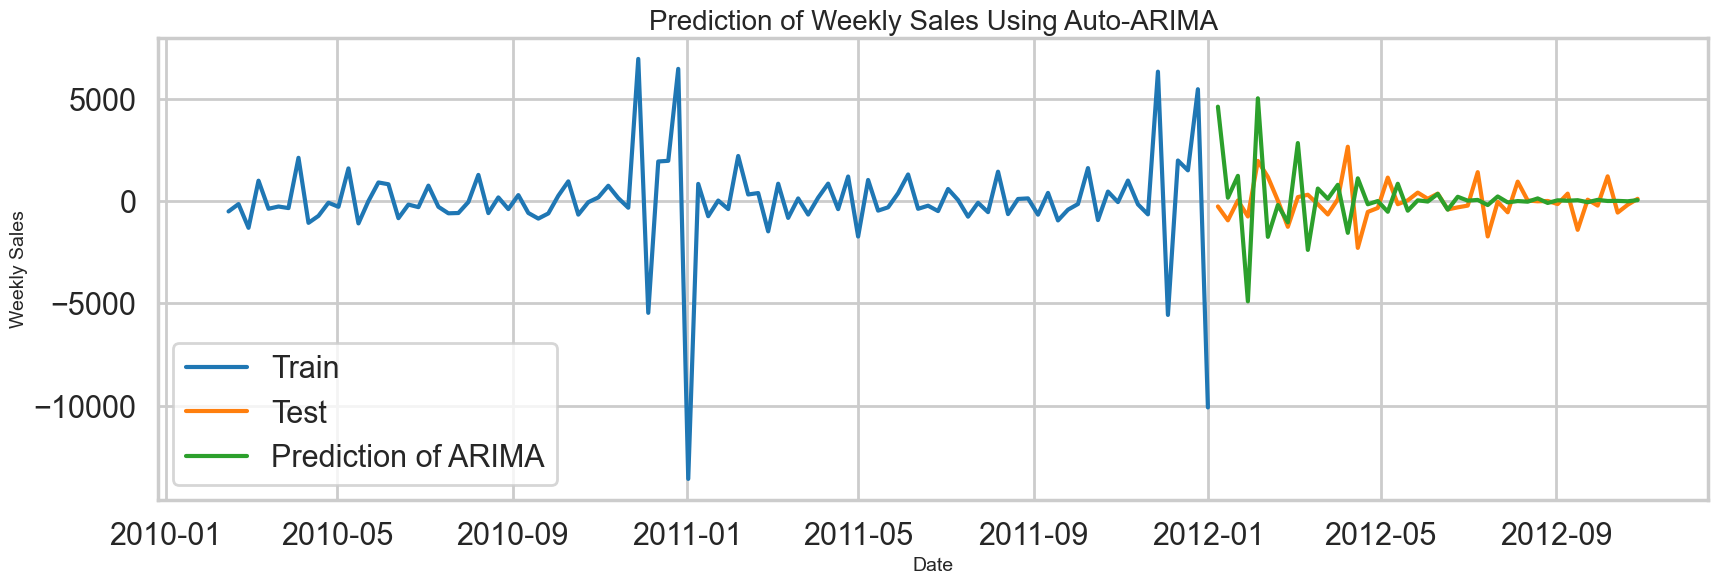

In [135]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

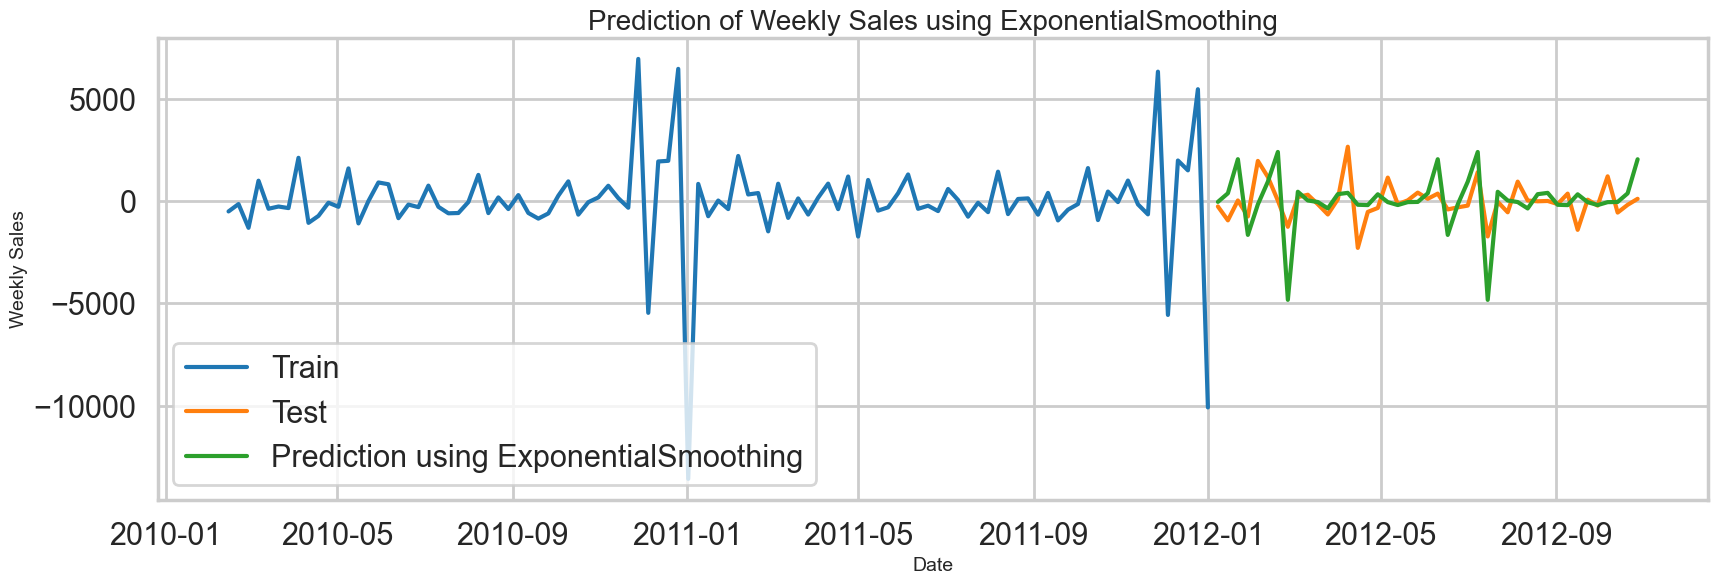

In [136]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive', trend='additive',damped=True).fit()
y_pred = model_holt_winters.forecast(len(test_data_diff))

plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [137]:
def wmae_test(target, pred, holidays=None):
    """
    Compute Weighted Mean Absolute Error (WMAE).

    Parameters:
    ----------
    target : pd.Series or np.array
        Actual values.
    pred : pd.Series or np.array
        Predicted values.
    holidays : pd.Series, np.array, or None
        Boolean series indicating holidays. If None, all weights = 1.

    Returns:
    -------
    float
        WMAE score.
    """
    target = np.array(target)
    pred = np.array(pred)

    if holidays is not None:
        holidays = np.array(holidays)
        weights = np.where(holidays, 5, 1)
    else:
        weights = np.ones(len(target))

    error = np.sum(weights * np.abs(target - pred)) / np.sum(weights)
    return error

test_data_diff_holidays = pd.Series([False]*len(test_data_diff))

wmae = wmae_test(test_data_diff, y_pred, holidays=test_data_diff_holidays)
print('WMAE:', wmae)

WMAE: 923.119482259168
